In [ ]:
import os
from PIL import Image

# 이미지가 저장된 폴더 경로 설정
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/val'

# 해당 폴더 내 모든 파일을 순회
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일 형식 확인
        # 이미지 파일 경로
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        with Image.open(image_path) as img:
            width, height = img.size  # 이미지의 크기 가져오기

        # 이미지 이름과 크기 출력
        print(f"Image: {filename}, Width: {width}, Height: {height}")


## EDA & Format

### 1. 데이터 확인
- 문제점1 : rgb(3840,2160) vs thermal(995,560)
- 확인 : 사이즈를 416으로 임의로 줄여도 인지할 수 있음
- 결론 : yolo로 변환에 있어 416,416으로 모든걸 맞추자.
- 할것 : 라벨링 정보를 416 기준으로 하고, 나중에 load과정에서 이미지를 416,416으로 가져옴
- 주의할점 : 전처리과정에서 증강,bbox같이

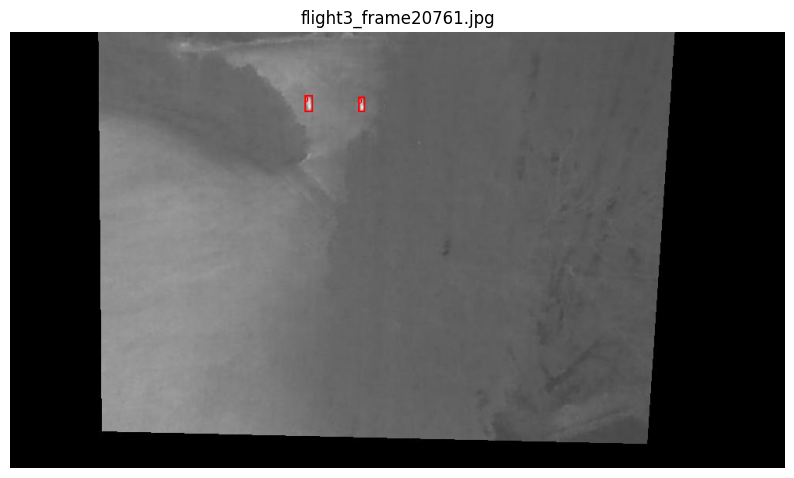

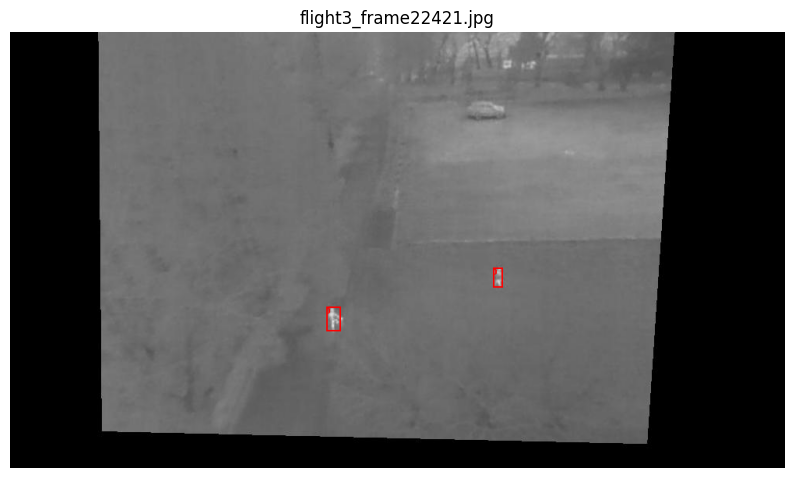

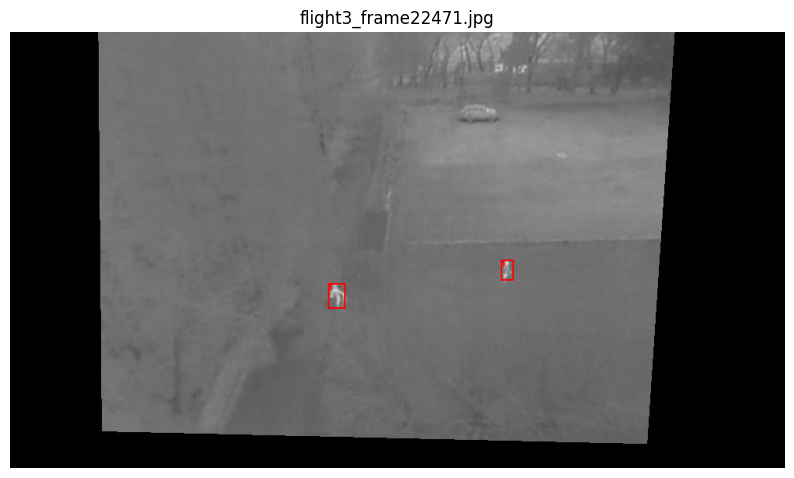

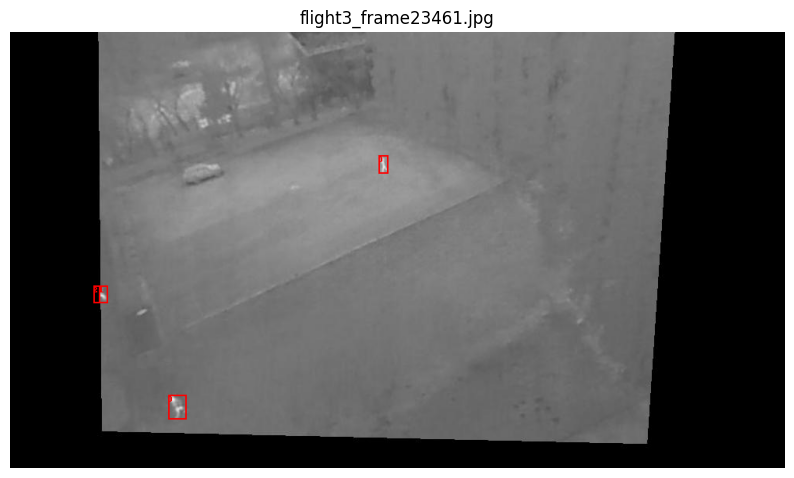

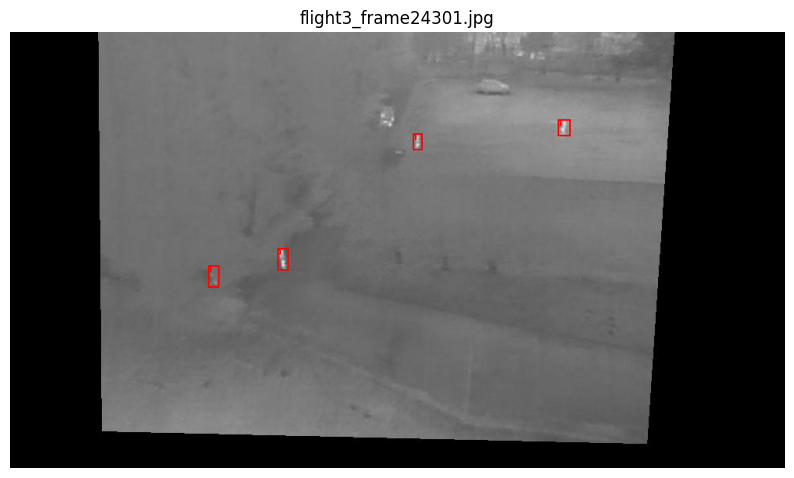

In [ ]:
import os
import random
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# 라벨과 이미지 경로 설정
label_folder = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/val'
image_folder = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/val'

# 이미지 원본 및 대상 크기
original_size = (3840, 2160)
target_size = (995, 560)

# 이미지 파일 리스트 가져오기
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
selected_images = random.sample(image_files, 5)  # 무작위로 5개 이미지 선택

# 이미지에 바운딩 박스와 타입 표시
def plot_images_with_boxes(image_files):
    for filename in image_files:
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

        # 이미지 열기
        with Image.open(image_path) as img:
            draw = ImageDraw.Draw(img)

            # 라벨 데이터 읽기
            if os.path.exists(label_path):
                labels = pd.read_csv(label_path, delimiter='\t', header=None, names=['x1', 'y1', 'x2', 'y2', 'type', 'occluded', 'bad'])
                for _, row in labels.iterrows():
                    # 원본 사이즈에서 대상 사이즈로 좌표 변환
                    x1 = int(row['x1'] * target_size[0] / original_size[0])
                    y1 = int(row['y1'] * target_size[1] / original_size[1])
                    x2 = int(row['x2'] * target_size[0] / original_size[0])
                    y2 = int(row['y2'] * target_size[1] / original_size[1])

                    # 바운딩 박스 그리기
                    draw.rectangle([x1, y1, x2, y2], outline='red', width=2)
                    draw.text((x1, y1), str(row['type']), fill='red')

            # 이미지 표시
            plt.figure(figsize=(10, 6))
            plt.imshow(img)
            plt.title(filename)
            plt.axis('off')
            plt.show()

plot_images_with_boxes(selected_images)


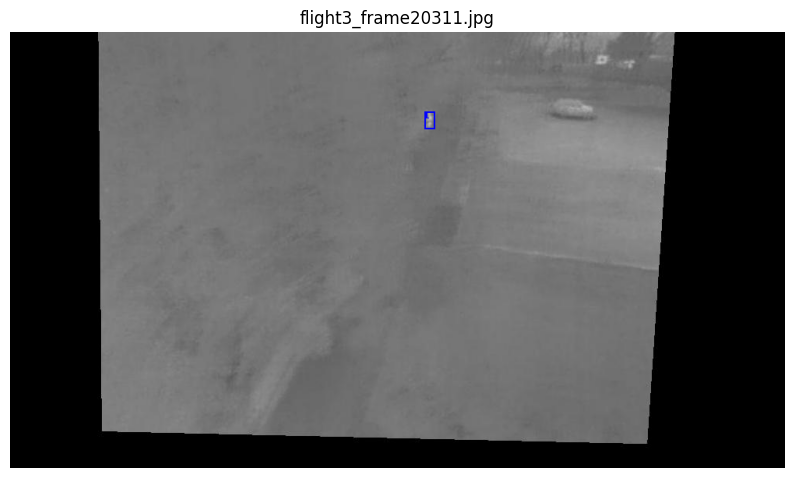

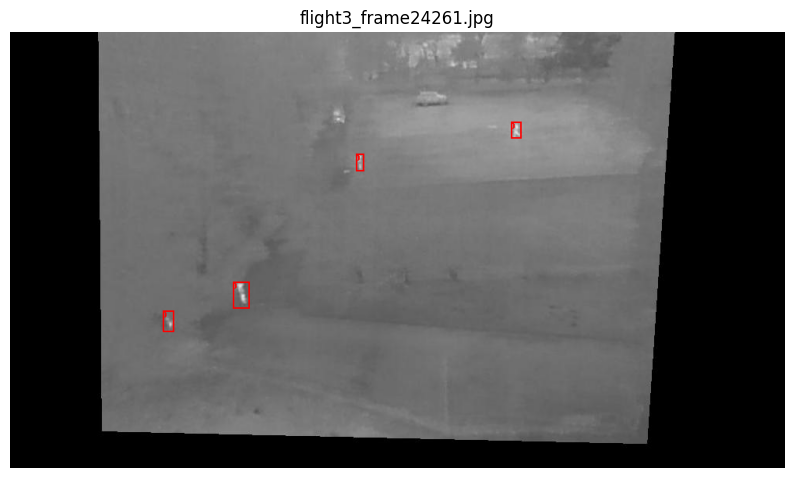

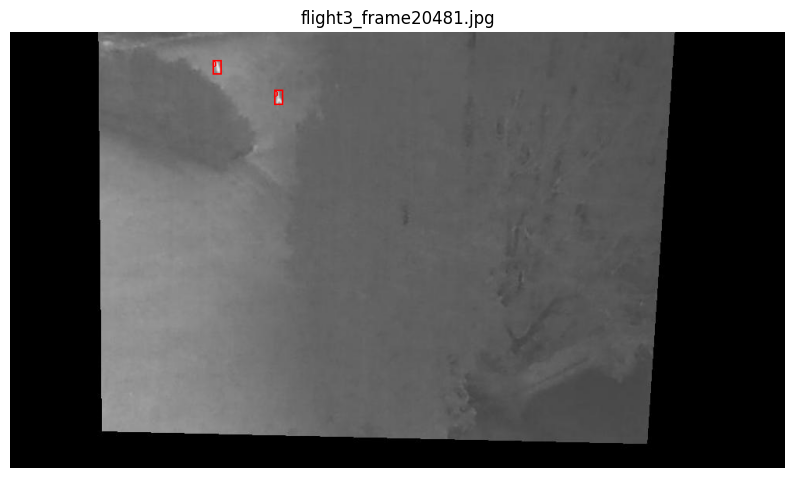

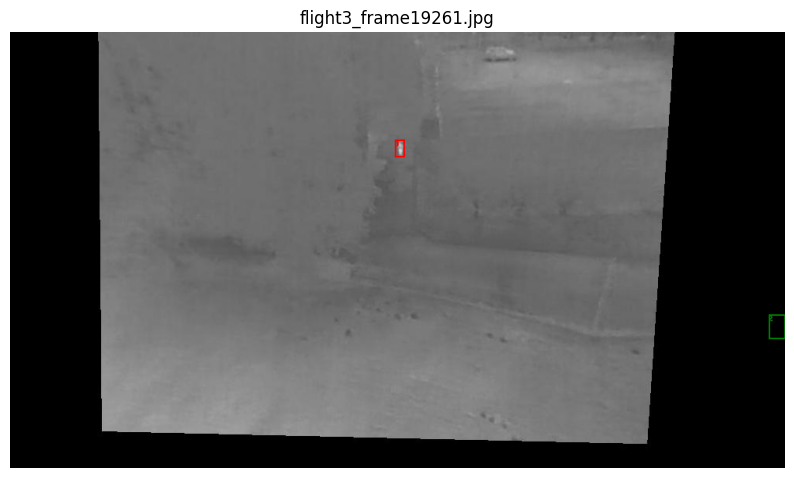

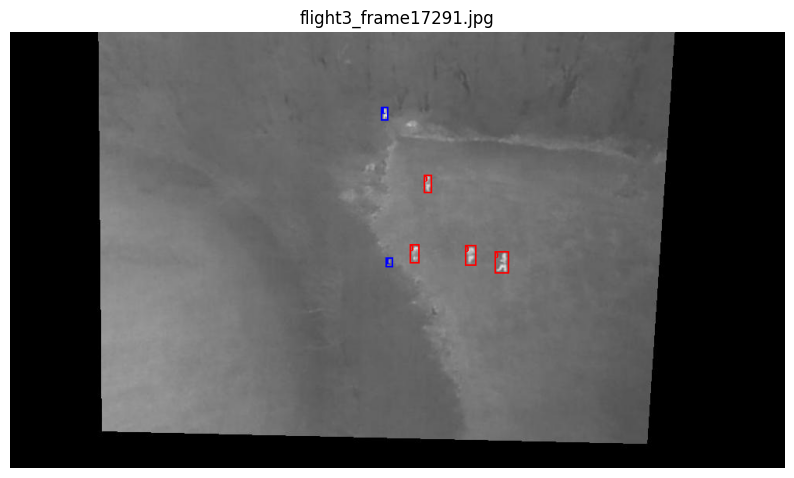

In [ ]:
import os
import random
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# 라벨과 이미지 경로 설정
label_folder = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/val'
image_folder = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/val'

# 이미지 원본 및 대상 크기
original_size = (3840, 2160)
target_size = (995, 560)

# 이미지 파일 리스트 가져오기
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
selected_images = random.sample(image_files, 5)  # 무작위로 5개 이미지 선택

# 이미지에 바운딩 박스와 타입 표시
def plot_images_with_boxes(image_files):
    colors = {0: 'red', 1: 'blue', 2: 'green'}

    for filename in image_files:
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

        # 이미지 열기
        with Image.open(image_path) as img:
            draw = ImageDraw.Draw(img)

            # 라벨 데이터 읽기
            if os.path.exists(label_path):
                labels = pd.read_csv(label_path, delimiter='\t', header=None, names=['x1', 'y1', 'x2', 'y2', 'type', 'occluded', 'bad'])
                for _, row in labels.iterrows():
                    # 원본 사이즈에서 대상 사이즈로 좌표 변환
                    x1 = int(row['x1'] * target_size[0] / original_size[0])
                    y1 = int(row['y1'] * target_size[1] / original_size[1])
                    x2 = int(row['x2'] * target_size[0] / original_size[0])
                    y2 = int(row['y2'] * target_size[1] / original_size[1])

                    # 바운딩 박스 그리기 및 타입 색상 설정
                    color = colors.get(row['type'], 'white')  # type이 0, 1, 2 외 값이면 white로 표시
                    draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
                    draw.text((x1, y1), str(row['type']), fill=color)

            # 이미지 표시
            plt.figure(figsize=(10, 6))
            plt.imshow(img)
            plt.title(filename)
            plt.axis('off')
            plt.show()

plot_images_with_boxes(selected_images)


<ipython-input-12-316dc870f18d>:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


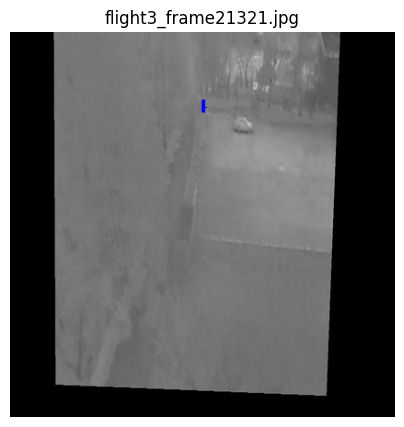

<ipython-input-12-316dc870f18d>:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


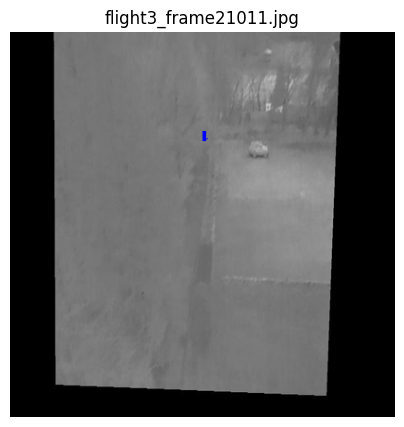

<ipython-input-12-316dc870f18d>:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


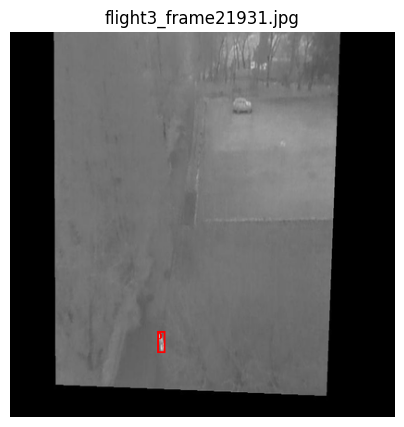

<ipython-input-12-316dc870f18d>:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


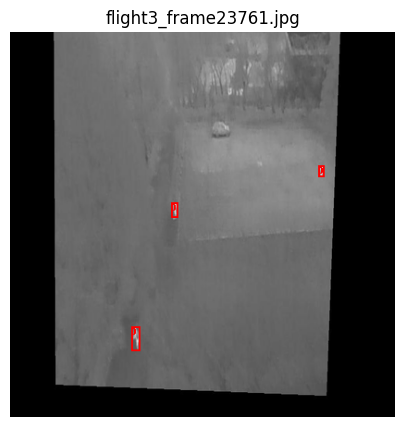

<ipython-input-12-316dc870f18d>:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


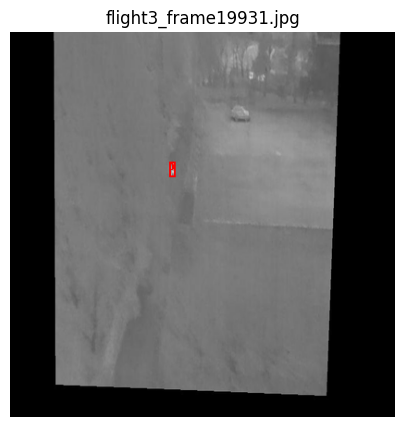

In [ ]:
import os
import random
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 라벨과 이미지 경로 설정
label_folder = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/val'
image_folder = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/val'

# 원본 라벨이 기반한 이미지 크기 및 대상 크기
label_original_size = (3840, 2160)
image_original_size = (995, 560)
target_size = (416, 416)  # 모든 이미지를 416x416으로 조정

# 이미지 파일 리스트 가져오기
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
selected_images = random.sample(image_files, 5)  # 무작위로 5개 이미지 선택

# 이미지에 바운딩 박스와 타입 표시
def plot_images_with_boxes(image_files):
    colors = {0: 'red', 1: 'blue', 2: 'green'}

    for filename in image_files:
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

        # 이미지 열기 및 리사이즈
        with Image.open(image_path) as img:
            img = img.resize(target_size, Image.ANTIALIAS)
            draw = ImageDraw.Draw(img)

            # 라벨 데이터 읽기
            if os.path.exists(label_path):
                labels = pd.read_csv(label_path, delimiter='\t', header=None, names=['x1', 'y1', 'x2', 'y2', 'type', 'occluded', 'bad'])
                for _, row in labels.iterrows():
                    # 라벨 데이터가 원래 기반한 이미지 크기에서 대상 크기로 좌표 변환
                    x1 = int(row['x1'] * target_size[0] / label_original_size[0])
                    y1 = int(row['y1'] * target_size[1] / label_original_size[1])
                    x2 = int(row['x2'] * target_size[0] / label_original_size[0])
                    y2 = int(row['y2'] * target_size[1] / label_original_size[1])

                    # 바운딩 박스 그리기 및 타입 색상 설정
                    color = colors.get(row['type'], 'white')  # type이 0, 1, 2 외 값이면 white로 표시
                    draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
                    draw.text((x1, y1), str(row['type']), fill=color)

            # 이미지 표시
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.title(filename)
            plt.axis('off')
            plt.show()

plot_images_with_boxes(selected_images)


### 2. 포맷 정리
- 폴더생성
- 포맷수정

In [ ]:
import os

def create_directories(base_path):
    os.makedirs(os.path.join(base_path, 'yolo_labels', 'rgb'), exist_ok=True)
    os.makedirs(os.path.join(base_path, 'yolo_labels', 'thermal'), exist_ok=True)

base_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t'  # 이 경로는 실제 프로젝트 경로로 수정
create_directories(base_path)


In [ ]:
label_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/train/flight1_frame00001.txt', delimiter='\t', header=None,
                         names=['image_name', 'x1', 'y1', 'x2', 'y2', 'type', 'occluded', 'bad'])


In [ ]:
label_data

,image_name,x1,y1,x2,y2,type,occluded,bad
0,77.06,249.28,261.14,493.08,2,1,0,NaN
1,291.10,484.53,582.21,950.75,2,0,0,NaN
2,2161.87,168.01,2324.55,634.23,0,0,0,NaN
3,1292.84,296.33,1455.52,724.05,0,0,0,NaN
4,1656.72,202.23,1832.24,685.56,0,0,0,NaN
5,445.22,570.07,582.21,953.82,1,0,0,NaN
6,475.18,201.03,616.45,384.95,0,1,0,NaN
7,440.94,269.47,483.75,406.34,1,1,0,NaN
8,1815.12,168.01,2166.15,667.25,0,0,0,NaN
9,351.04,219.34,479.46,407.54,2,1,0,NaN


In [ ]:
import os
import pandas as pd

def convert_coco_to_yolo(x_min, y_min, x_max, y_max, img_width, img_height):
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return [
        x_center / img_width,
        y_center / img_height,
        width / img_width,
        height / img_height
    ]

def process_labels(label_dir, output_base):
    img_width, img_height = 3840, 2160
    splits = ['train', 'val']

    for split in splits:
        label_path = os.path.join(label_dir, split)
        files = os.listdir(label_path)

        for file in files:
            filepath = os.path.join(label_path, file)
            label_data = pd.read_csv(filepath, delimiter='\t', header=None,
                                     names=['x1', 'y1', 'x2', 'y2', 'type', 'occluded', 'bad'])
            image_name = os.path.splitext(file)[0] + '.jpg'  # 파일 이름에서 확장자를 제거하고 이미지 파일 이름을 생성

            rgb_lines = []
            thermal_lines = []

            for index, row in label_data.iterrows():
                yolo_bbox = convert_coco_to_yolo(row['x1'], row['y1'], row['x2'], row['y2'], img_width, img_height)
                line = f"0 {' '.join(map(str, yolo_bbox))}\n"

                if row['type'] in [0, 2]:
                    rgb_lines.append(line)
                if row['type'] in [0, 1]:
                    thermal_lines.append(line)

            if rgb_lines:
                rgb_dir = os.path.join(output_base, 'rgb', split)
                os.makedirs(rgb_dir, exist_ok=True)
                with open(os.path.join(rgb_dir, os.path.splitext(file)[0] + '.txt'), 'w') as f:
                    f.writelines(rgb_lines)

            if thermal_lines:
                thermal_dir = os.path.join(output_base, 'thermal', split)
                os.makedirs(thermal_dir, exist_ok=True)
                with open(os.path.join(thermal_dir, os.path.splitext(file)[0] + '.txt'), 'w') as f:
                    f.writelines(thermal_lines)

base_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t'
label_dir = os.path.join(base_path, 'labels')
output_base = os.path.join(base_path, 'yolo_labels')
process_labels(label_dir, output_base)


In [ ]:
#파일 수 확인
def count_files(directory):
    """ 지정된 디렉토리의 파일 수를 세어 반환합니다. """
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# 파일 수 계산
train_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/train')
val_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/val')

train_rgb_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/train')
train_thermal_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/train')

val_rgb_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/val')
val_thermal_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/val')

print("전체 train label:", train_count)
print("나눈 rgb train(=전체 train label):", train_rgb_count)
print("나눈 thermal train(=전체 train label):", train_thermal_count)


print("\n\n전체 val label:", val_count)
print("나눈 rgb val(=전체 val label):", val_rgb_count)
print("나눈 thermal val(=전체 val label):", val_thermal_count)


전체 train label: 4980
나눈 rgb train(=전체 train label): 4130
나눈 thermal train(=전체 train label): 4406


전체 val label: 900
나눈 rgb val(=전체 val label): 727
나눈 thermal val(=전체 val label): 730


-위 코딩은 박스표시가 없을경우,빈 텍파를 생성X
-아래코딩은 빈 파일 생성 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def create_directories(base_path):
    os.makedirs(os.path.join(base_path, 'yolo_labels', 'rgb'), exist_ok=True)
    os.makedirs(os.path.join(base_path, 'yolo_labels', 'thermal'), exist_ok=True)

base_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t'  # 이 경로는 실제 프로젝트 경로로 수정
create_directories(base_path)

In [ ]:
import os
import pandas as pd

def convert_coco_to_yolo(x_min, y_min, x_max, y_max, img_width, img_height):
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return [
        x_center / img_width,  # 중심 x 좌표 (정규화됨)
        y_center / img_height, # 중심 y 좌표 (정규화됨)
        width / img_width,     # 너비 (정규화됨)
        height / img_height    # 높이 (정규화됨)
    ]

def process_labels(label_dir, output_base):
    img_width, img_height = 3840, 2160
    splits = ['train', 'val']

    for split in splits:
        label_path = os.path.join(label_dir, split)
        files = os.listdir(label_path)

        for file in files:
            filepath = os.path.join(label_path, file)
            label_data = pd.read_csv(filepath, delimiter='\t', header=None,
                                     names=['x1', 'y1', 'x2', 'y2', 'type', 'occluded', 'bad'])
            image_name = os.path.splitext(file)[0]  # 확장자를 제거하여 이미지 이름 생성

            rgb_lines = []
            thermal_lines = []

            for index, row in label_data.iterrows():
                yolo_bbox = convert_coco_to_yolo(row['x1'], row['y1'], row['x2'], row['y2'], img_width, img_height)
                line = f"0 {' '.join(map(str, yolo_bbox))}\n"

                if row['type'] in [0, 2]:
                    rgb_lines.append(line)
                if row['type'] in [0, 1]:
                    thermal_lines.append(line)

            # RGB 및 Thermal 디렉터리 생성 및 파일 쓰기
            rgb_dir = os.path.join(output_base, 'rgb', split)
            thermal_dir = os.path.join(output_base, 'thermal', split)
            os.makedirs(rgb_dir, exist_ok=True)
            os.makedirs(thermal_dir, exist_ok=True)

            # 파일 쓰기, 라인이 비어있으면 빈 파일을 생성
            with open(os.path.join(rgb_dir, image_name + '.txt'), 'w') as f:
                f.writelines(rgb_lines)
            with open(os.path.join(thermal_dir, image_name + '.txt'), 'w') as f:
                f.writelines(thermal_lines)

base_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t'
label_dir = os.path.join(base_path, 'labels')
output_base = os.path.join(base_path, 'yolo_labels')
process_labels(label_dir, output_base)

In [ ]:
#파일 수 확인
def count_files(directory):
    """ 지정된 디렉토리의 파일 수를 세어 반환합니다. """
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# 파일 수 계산
train_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/train')
val_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/labels/val')

train_rgb_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/train')
train_thermal_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/train')

val_rgb_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/val')
val_thermal_count = count_files('/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/val')

print("전체 train label:", train_count)
print("나눈 rgb train(=전체 train label):", train_rgb_count)
print("나눈 thermal train(=전체 train label):", train_thermal_count)


print("\n\n전체 val label:", val_count)
print("나눈 rgb val(=전체 val label):", val_rgb_count)
print("나눈 thermal val(=전체 val label):", val_thermal_count)


전체 train label: 4980
나눈 rgb train(=전체 train label): 4980
나눈 thermal train(=전체 train label): 4980


전체 val label: 900
나눈 rgb val(=전체 val label): 900
나눈 thermal val(=전체 val label): 900


In [ ]:
#이미지로 확인

import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd

def plot_images_with_boxes(base_path, images_folder, labels_folder):
    image_files = os.listdir(os.path.join(base_path, images_folder))
    selected_images = random.sample(image_files, 5)  # 랜덤하게 5개의 이미지 선택

    fig, ax = plt.subplots(5, 1, figsize=(10, 50))  # 5개의 이미지를 표시하기 위한 subplot 생성

    for idx, img_file in enumerate(selected_images):
        img_path = os.path.join(base_path, images_folder, img_file)
        label_path = os.path.join(base_path, labels_folder, os.path.splitext(img_file)[0] + '.txt')

        img = Image.open(img_path)
        ax[idx].imshow(img)
        ax[idx].set_title(img_file)
        ax[idx].axis('off')  # 축 표시 제거

        if os.path.exists(label_path):
            labels = pd.read_csv(label_path, delimiter=' ', header=None, names=['class_id', 'x_center', 'y_center', 'width', 'height'])

            for _, row in labels.iterrows():
                # YOLO 포맷 좌표를 PIL 이미지 좌표로 변환
                x_center = row['x_center'] * img.width
                y_center = row['y_center'] * img.height
                box_width = row['width'] * img.width
                box_height = row['height'] * img.height

                rect = patches.Rectangle((x_center - box_width / 2, y_center - box_height / 2),
                                         box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')
                ax[idx].add_patch(rect)

    plt.show()

# 기본 경로 설정
base_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t'
images_folder = 'images/rgb/train'  # 이미지 폴더
labels_folder = 'yolo_labels/rgb/train'  # 라벨 파일 폴더
plot_images_with_boxes(base_path, images_folder, labels_folder)


Output hidden; open in https://colab.research.google.com to view.

#### 드가자 앙상블의 세계로 -> 다른 파일(ensemble_yolo)




### 3. val/test셋 나누기

In [ ]:
#rgb_val 먼저 데이터 쪼개기

import os
import shutil
from sklearn.model_selection import train_test_split

# 기존 val 폴더 경로
original_val_images_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/rgb/val'
original_val_labels_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/val'

# 이미지 파일 리스트
image_files = os.listdir(original_val_images_path)
label_files = os.listdir(original_val_labels_path)

# 파일 목록 정렬
image_files.sort()
label_files.sort()

# 이미지와 레이블의 파일 이름이 정확히 일치하는지 검사
assert all(img.split('.')[0] == lbl.split('.')[0] for img, lbl in zip(image_files, label_files)), "Image and label names do not match!"


In [1]:
#rgb_val 먼저 데이터 쪼개기

import os
import shutil
from sklearn.model_selection import train_test_split

# 기존 val 폴더 경로
# original_val_images_path = '/content/drive/My Drive/images/rgb/val'
# original_val_labels_path = '/content/drive/My Drive/yolo_labels/rgb/val'
original_val_images_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/rgb/val'
original_val_labels_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/val'


# 이미지 파일 리스트
image_files = os.listdir(original_val_images_path)
label_files = os.listdir(original_val_labels_path)

# 파일 목록 정렬
image_files.sort()
label_files.sort()

# 이미지와 레이블의 파일 이름이 정확히 일치하는지 검사
assert all(img.split('.')[0] == lbl.split('.')[0] for img, lbl in zip(image_files, label_files)), "Image and label names do not match!"

# 데이터 분할 (예: 70% split_val, 30% test)
split_val_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)

# 새로운 폴더 생성
new_split_val_images_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/rgb/split_val'
new_test_images_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/rgb/test'
new_split_val_labels_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/split_val'
new_test_labels_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/test'

os.makedirs(new_split_val_images_path, exist_ok=True)
os.makedirs(new_test_images_path, exist_ok=True)
os.makedirs(new_split_val_labels_path, exist_ok=True)
os.makedirs(new_test_labels_path, exist_ok=True)

# 파일 복사 함수
def copy_files(file_list, src_images, dest_images, src_labels, dest_labels):
    for file in file_list:
        image_src_file = os.path.join(src_images, file)
        image_dest_file = os.path.join(dest_images, file)
        label_src_file = os.path.join(src_labels, file.replace('.jpg', '.txt'))
        label_dest_file = os.path.join(dest_labels, file.replace('.jpg', '.txt'))

        shutil.copy(image_src_file, image_dest_file)
        shutil.copy(label_src_file, label_dest_file)

# 파일 복사 실행
copy_files(split_val_files, original_val_images_path, new_split_val_images_path, original_val_labels_path, new_split_val_labels_path)
copy_files(test_files, original_val_images_path, new_test_images_path, original_val_labels_path, new_test_labels_path)


In [3]:
#rgb만 일단
import os

# 폴더 경로 설정
folders = {
    'Original Val Images': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/rgb/val',
    'Split Val Images': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/rgb/split_val',
    'Test Images': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/rgb/test',
    'Original Val Labels': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/val',
    'Split Val Labels': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/split_val',
    'Test Labels': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/rgb/test'
}

# 각 폴더의 파일 수 계산 및 출력
for name, path in folders.items():
    file_count = len(os.listdir(path))
    print(f"{name}: {file_count} files")


Original Val Images: 900 files
Split Val Images: 630 files
Test Images: 270 files
Original Val Labels: 900 files
Split Val Labels: 630 files
Test Labels: 270 files


In [2]:
#rgb_val 먼저 데이터 쪼개기

import os
import shutil
from sklearn.model_selection import train_test_split

# 기존 val 폴더 경로
# original_val_images_path = '/content/drive/My Drive/images/rgb/val'
# original_val_labels_path = '/content/drive/My Drive/yolo_labels/rgb/val'
original_val_images_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/val'
original_val_labels_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/val'


# 이미지 파일 리스트
image_files = os.listdir(original_val_images_path)
label_files = os.listdir(original_val_labels_path)

# 파일 목록 정렬
image_files.sort()
label_files.sort()

# 이미지와 레이블의 파일 이름이 정확히 일치하는지 검사
assert all(img.split('.')[0] == lbl.split('.')[0] for img, lbl in zip(image_files, label_files)), "Image and label names do not match!"

# 데이터 분할 (예: 70% split_val, 30% test)
split_val_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)

# 새로운 폴더 생성
new_split_val_images_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/split_val'
new_test_images_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/test'
new_split_val_labels_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/split_val'
new_test_labels_path = '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/test'

os.makedirs(new_split_val_images_path, exist_ok=True)
os.makedirs(new_test_images_path, exist_ok=True)
os.makedirs(new_split_val_labels_path, exist_ok=True)
os.makedirs(new_test_labels_path, exist_ok=True)

# 파일 복사 함수
def copy_files(file_list, src_images, dest_images, src_labels, dest_labels):
    for file in file_list:
        image_src_file = os.path.join(src_images, file)
        image_dest_file = os.path.join(dest_images, file)
        label_src_file = os.path.join(src_labels, file.replace('.jpg', '.txt'))
        label_dest_file = os.path.join(dest_labels, file.replace('.jpg', '.txt'))

        shutil.copy(image_src_file, image_dest_file)
        shutil.copy(label_src_file, label_dest_file)

# 파일 복사 실행
copy_files(split_val_files, original_val_images_path, new_split_val_images_path, original_val_labels_path, new_split_val_labels_path)
copy_files(test_files, original_val_images_path, new_test_images_path, original_val_labels_path, new_test_labels_path)


In [4]:
#rgb만 일단
import os

# 폴더 경로 설정
folders = {
    'Original Val Images': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/val',
    'Split Val Images': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/split_val',
    'Test Images': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/images/thermal/test',
    'Original Val Labels': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/val',
    'Split Val Labels': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/split_val',
    'Test Labels': '/content/drive/MyDrive/Colab Notebooks/2024_1/capstone/drone/rgb-t/yolo_labels/thermal/test'
}

# 각 폴더의 파일 수 계산 및 출력
for name, path in folders.items():
    file_count = len(os.listdir(path))
    print(f"{name}: {file_count} files")


Original Val Images: 900 files
Split Val Images: 630 files
Test Images: 270 files
Original Val Labels: 900 files
Split Val Labels: 630 files
Test Labels: 270 files
